<center>

# **GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP)**
### **ORGANIZER** : The Sparks Foundation
### **DOMAIN**    : Data Science and Business Analytics 


PROJECT DETAILS : **TASK 2**


**MADE BY** : Yuvraj Singh Chauhan

**OBJECTIVE** : To predict the optimum number of clusters in the Iris data set.

**METHOD USED** : Unsupervised Machine Learning (K-Mean Clustering)
</center>


### 1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import KFold,train_test_split,cross_val_score

### 2. Importing the datasets

In [ ]:
# importing the dataset and converting into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/yuvrajsinghchauhan/The-Spark-Foundation-Tasks/main/Task%202/Iris.csv') 
# displaying top 10 rows of the data
df.head(10)                                   

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 3. Data Exploration and churning

In [ ]:
# randomly shuffle the data to avoid bias
df.sample(5)         

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [ ]:
# printing the number of rows and columns in the dataset
r,c = df.shape
print("Number of rows    = ",r)
print("Number of columns = ",c)

Number of rows    =  150
Number of columns =  6


In [ ]:
# checking for the datatypes in the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# removing unnecessary columns
df.drop(columns='Id',inplace=True)

### 4. Checking and replacing missing values

In [ ]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? False


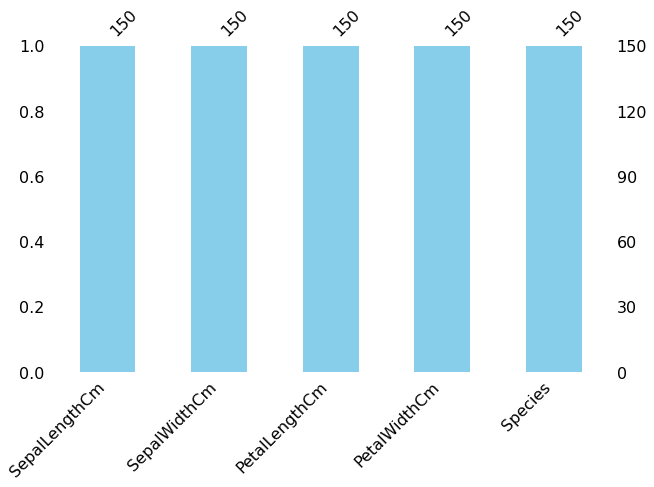

In [ ]:
# visually representing the null values present in columns
msno.bar(df,figsize=(10,6),color='skyblue')
plt.show()

### 5. Statistical analysis of data


In [ ]:
# summary of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# displaying unique species of Iris flower
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 6. Parametric Visualization of dataframe

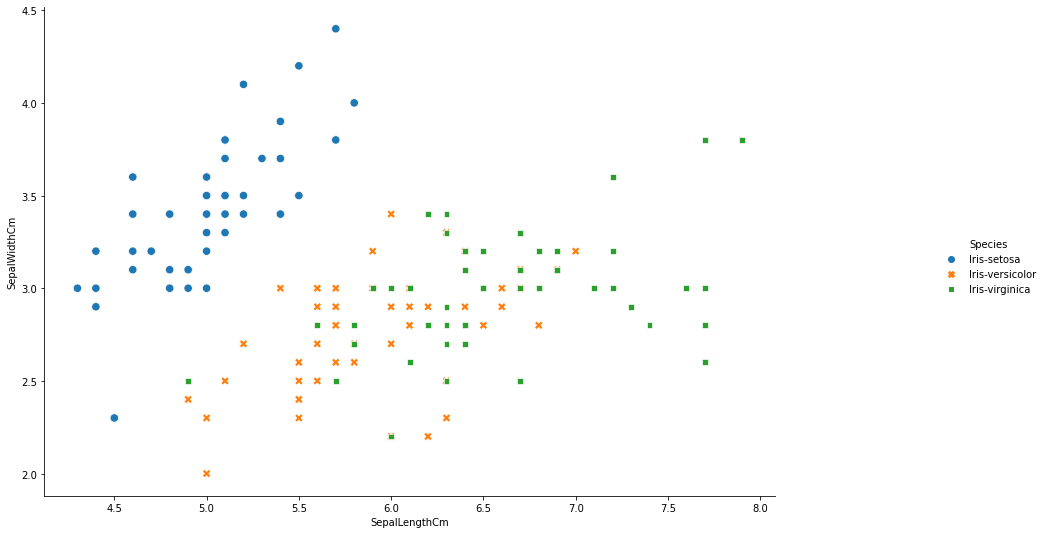

In [ ]:
# relative density of species parameters
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species',s=70)
g.fig.set_size_inches(16,8)
plt.show()

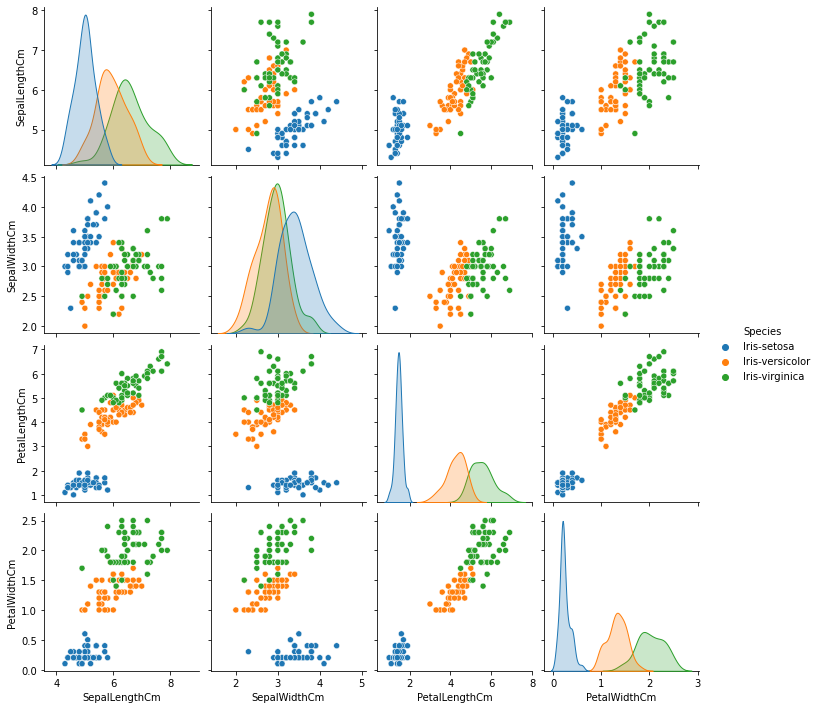

In [ ]:
# Pair plot of each species

sns.pairplot(df,hue='Species')
plt.show()

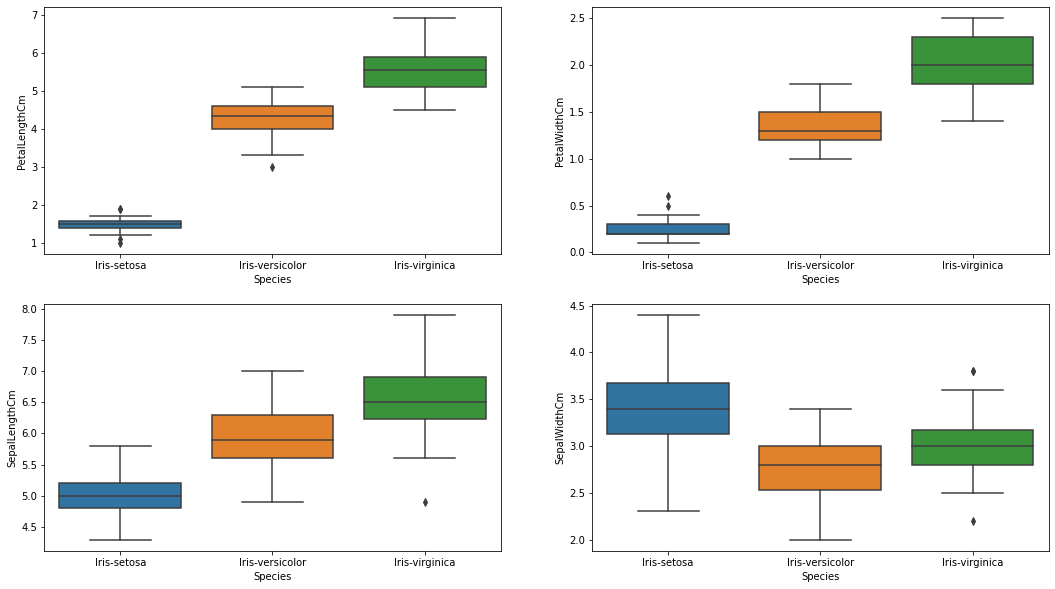

In [ ]:
# Box-plot of the species parameters  (to check for outliers)
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
ax=sns.boxplot(x='Species',y='PetalLengthCm',data=df)

plt.subplot(2,2,2)
ax=sns.boxplot(x='Species',y='PetalWidthCm',data=df)

plt.subplot(2,2,3)
ax=sns.boxplot(x='Species',y='SepalLengthCm',data=df)

plt.subplot(2,2,4)
ax=sns.boxplot(x='Species',y='SepalWidthCm',data=df)

plt.show()

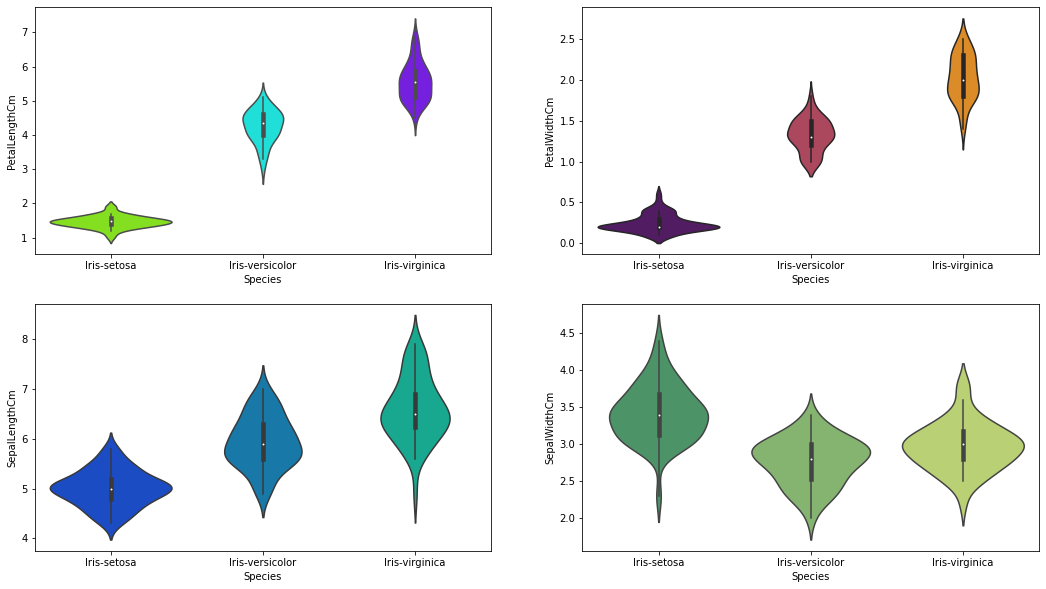

In [ ]:
# Violin-plot of the species parameters   (to check data deviations and distributions)
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df,palette='hsv')

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df,palette='inferno')

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df,palette='winter')

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df,palette='summer')
plt.show()

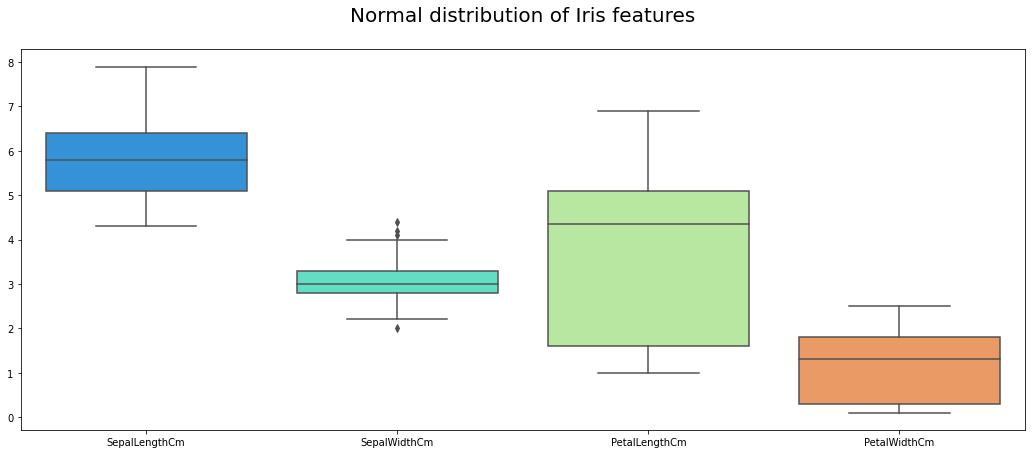

In [ ]:
# Overall outliers
plt.figure(figsize=(18,7))
sns.boxplot(data=df,palette='rainbow').set_title("Normal distribution of Iris features\n",size=20)
plt.show()


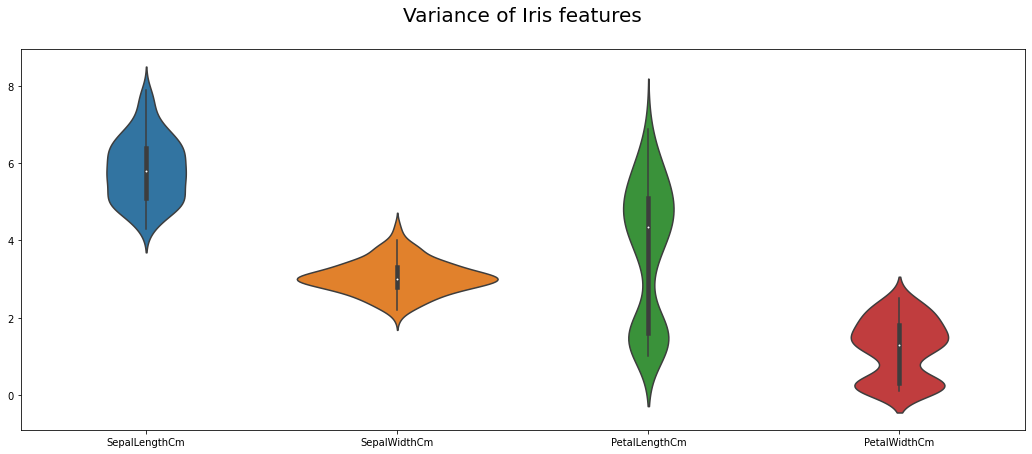

In [ ]:
# Overall variances
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()

### 7. Attribute Correlation

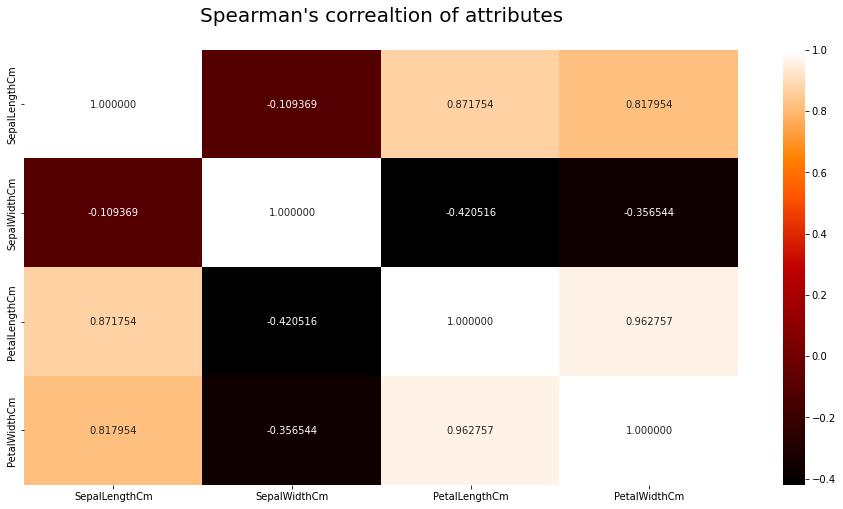

In [ ]:
# Spearman's correlation between different parameters 
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Spearman\'s correaltion of attributes\n',size=20)
plt.show()

### 8. Modelling and Visualization of Clusters

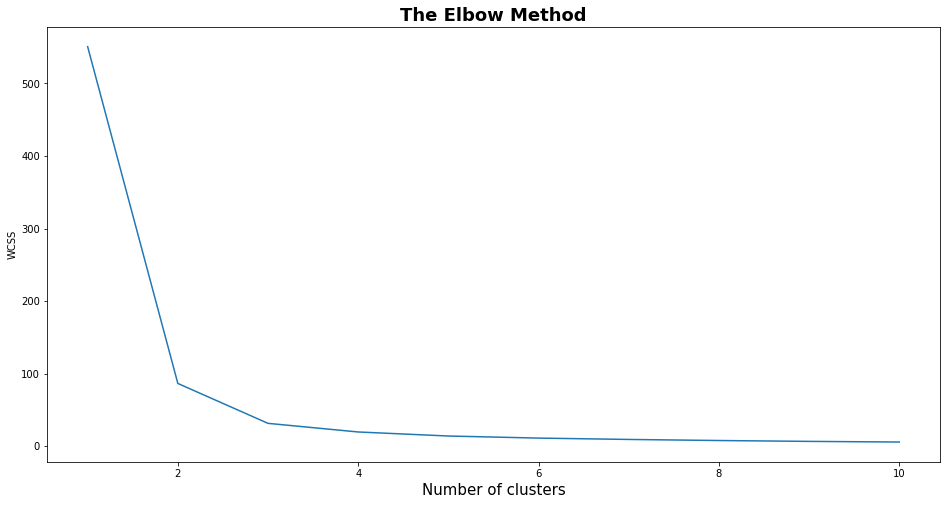

In [ ]:
# Reaching optimum number of clusters count through Elbow Method
X = df.iloc[:,[3,4]].values
wcss = []
plt.figure(figsize=(16,8))
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method',fontsize='18',fontweight='bold')
plt.xlabel('Number of clusters',fontsize='15')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Setting cluster prediction
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

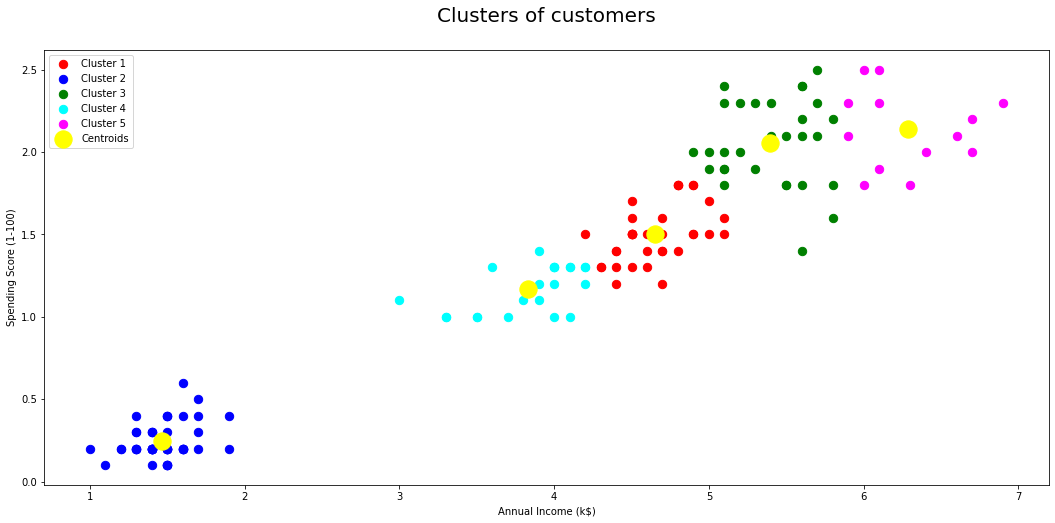

In [ ]:
# Final visualization of structure
plt.figure(figsize=(18,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers\n',size=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 9. Conclusion

In this project, using the K-Mean Clustering method we have calculated the optimum number of clusters and plotted the clusters. Apart from these we have discovered several parametric correlations and insights from the graphs. So, we have successfully achieved our target through the experiment!